# Prvi seminarski rad iz predmeta Prikupljanje i predobrada podataka za masinsko ucenje


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


None

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [3]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [6]:
df['floor_number'] = df['Floor'].str.extract(r'([^ ]+) out of [^ ]+')
df['total_floors'] = df['Floor'].str.extract(r'[^ ]+ out of ([^ ]+)')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_number,total_floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [7]:
df['floor_number'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Basement', '11', '6',
       '14', '43', '13', '18', '17', '9', '19', '60', '34', '12', '26',
       '25', '53', '16', '10', '39', '32', '47', '28', '20', '15', '65',
       '40', '37', '22', '21', '30', '35', '33', '44', '41', '46', '27',
       '45', '48', '50', '24', '23', '29', '49', '36', '76', nan],
      dtype=object)

In [8]:
df['total_floors'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', nan],
      dtype=object)

In [9]:
df.drop('Floor', axis=1, inplace=True)

In [10]:
# nan count
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
floor_number         4
total_floors         4
dtype: int64

In [11]:
# remove nan
df.dropna(inplace=True)
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
floor_number         0
total_floors         0
dtype: int64

In [12]:
df.loc[df['floor_number'] == 'Ground', 'floor_number'] = '0'
df.loc[df['floor_number'] == 'Basement', 'floor_number'] = '-1'
df['floor_number'] = df['floor_number'].astype(int)
df['total_floors'] = df['total_floors'].astype(int)
df.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_number,total_floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [13]:
# count duplicate
df.duplicated().sum()

0

In [16]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'floor_number', 'total_floors'],
      dtype='object')

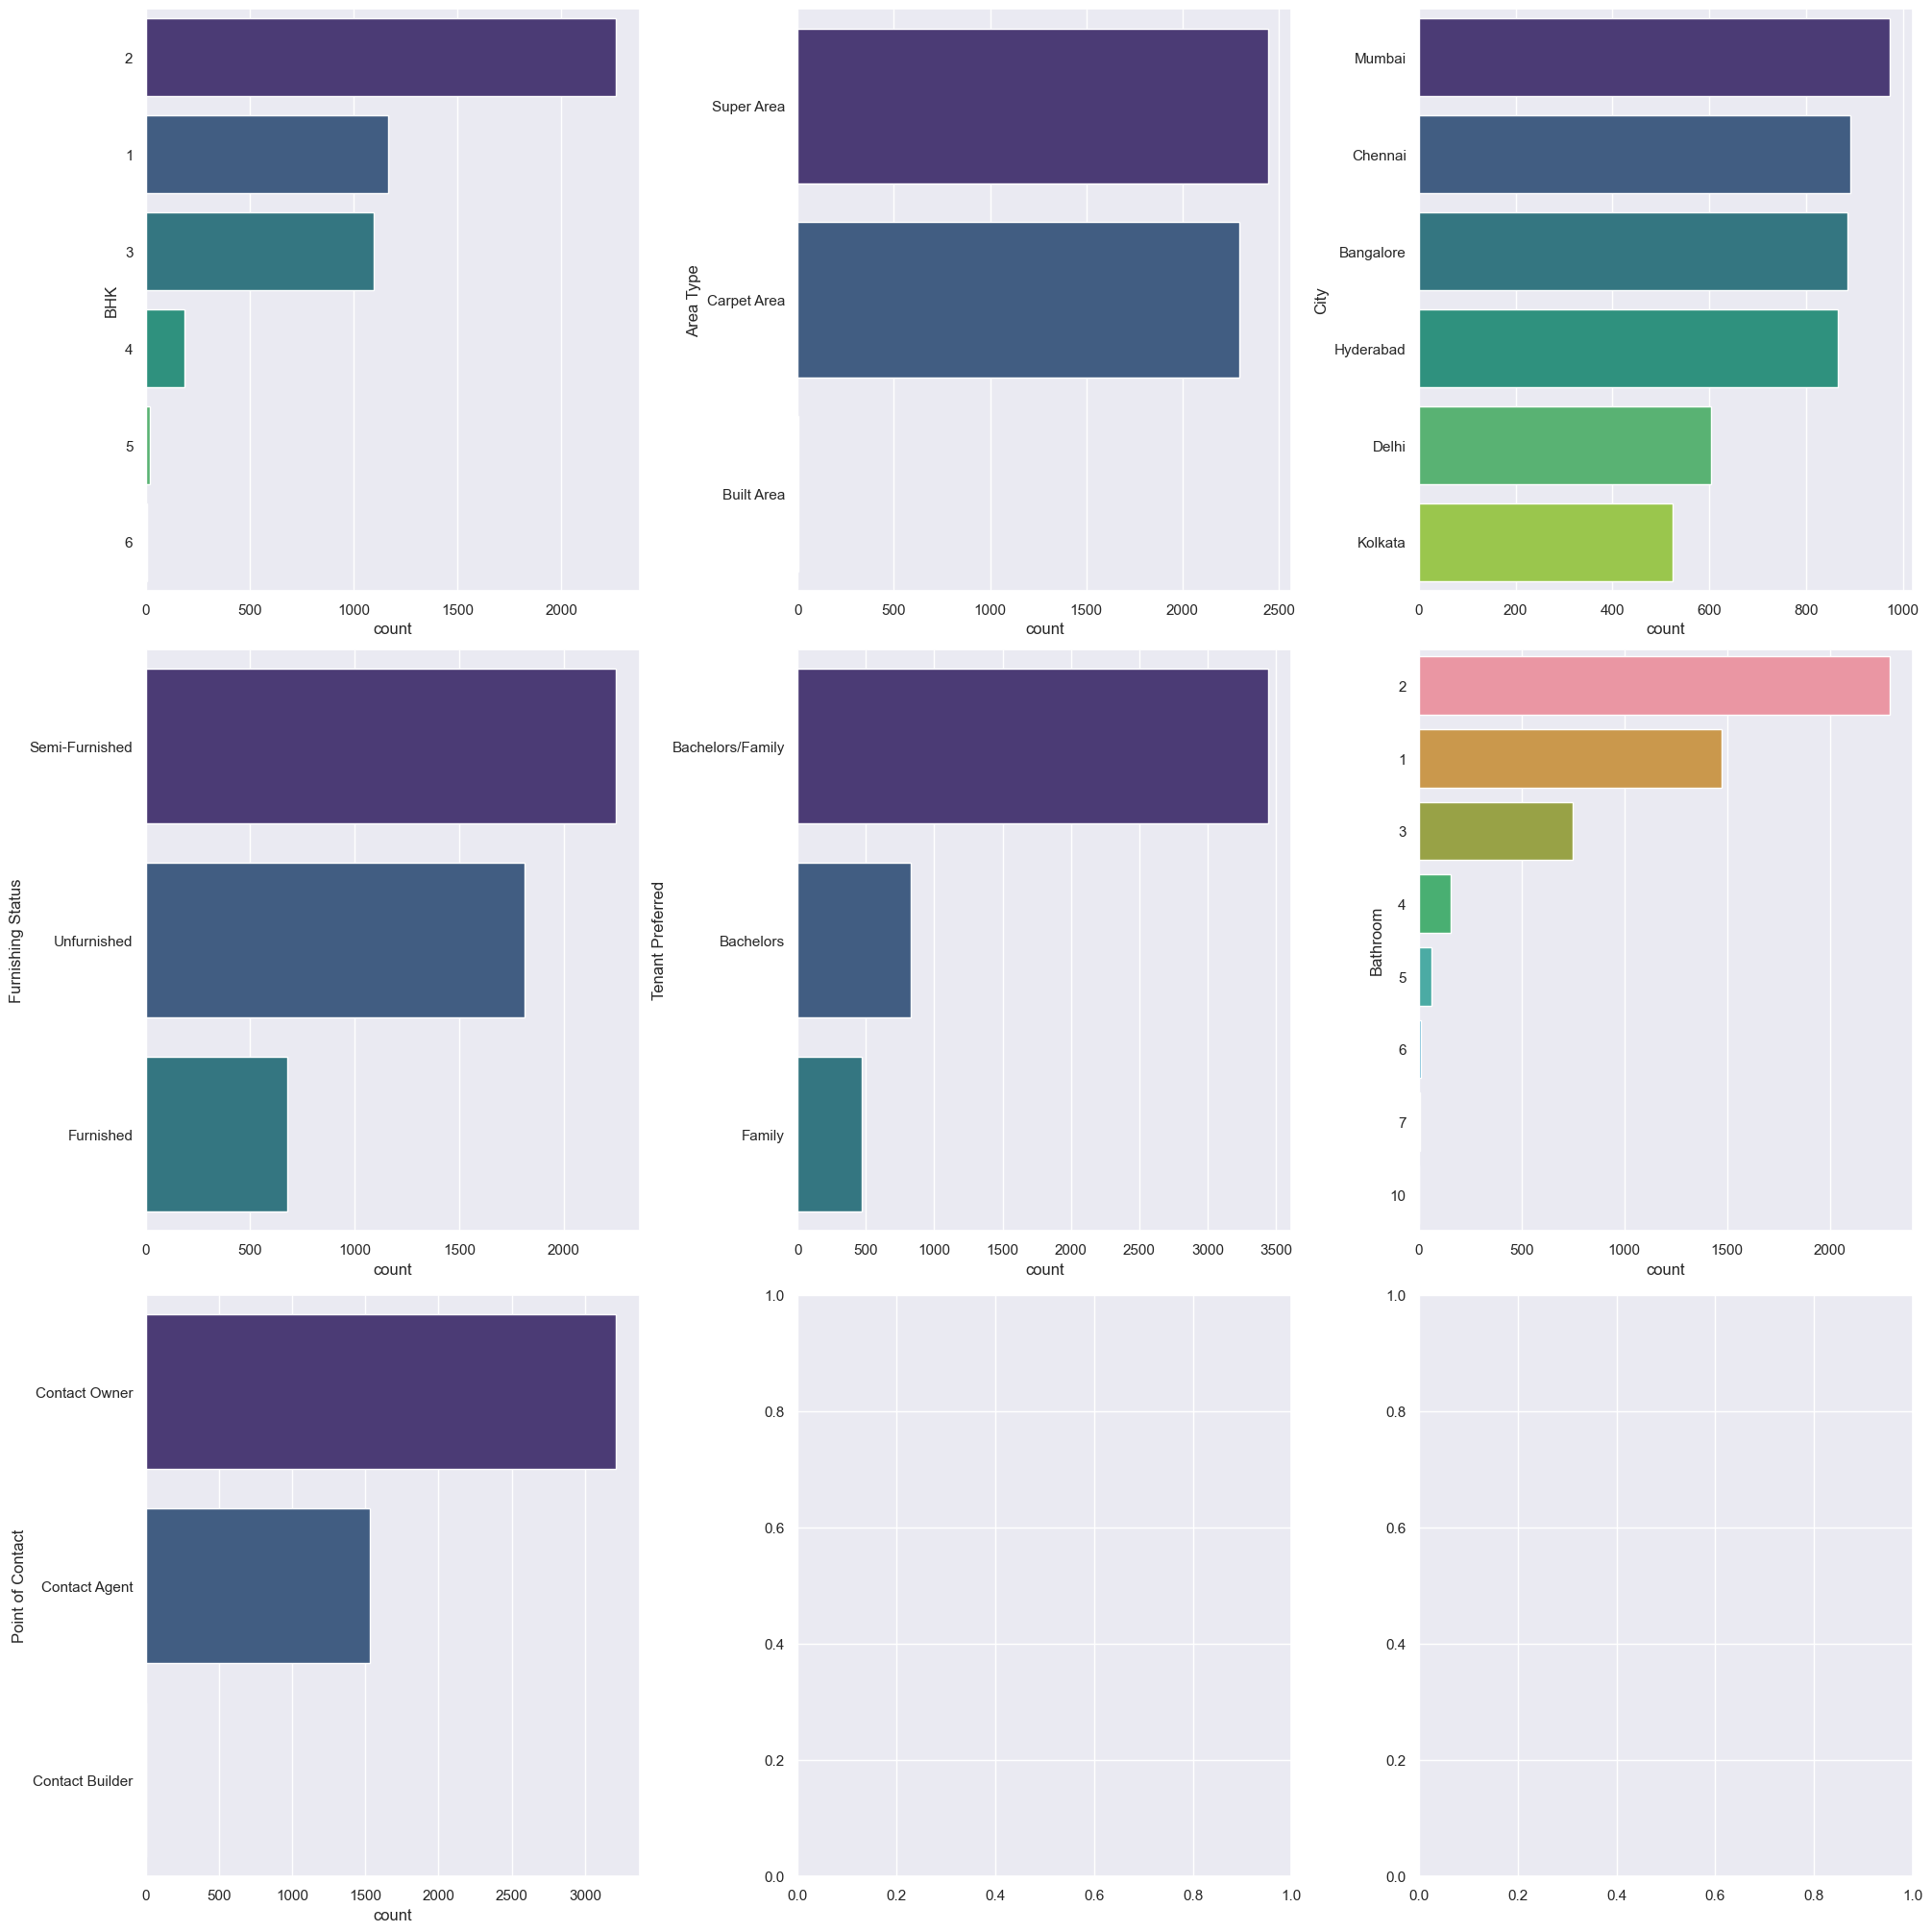

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)
cols_to_plot = ['BHK', 'Area Type',
                'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
                'Point of Contact']
for i, f in enumerate(cols_to_plot):
    sns.countplot(y=f, data=df,
                  ax=axs[i//3][i % 3],
                  order=df[f].value_counts().index)

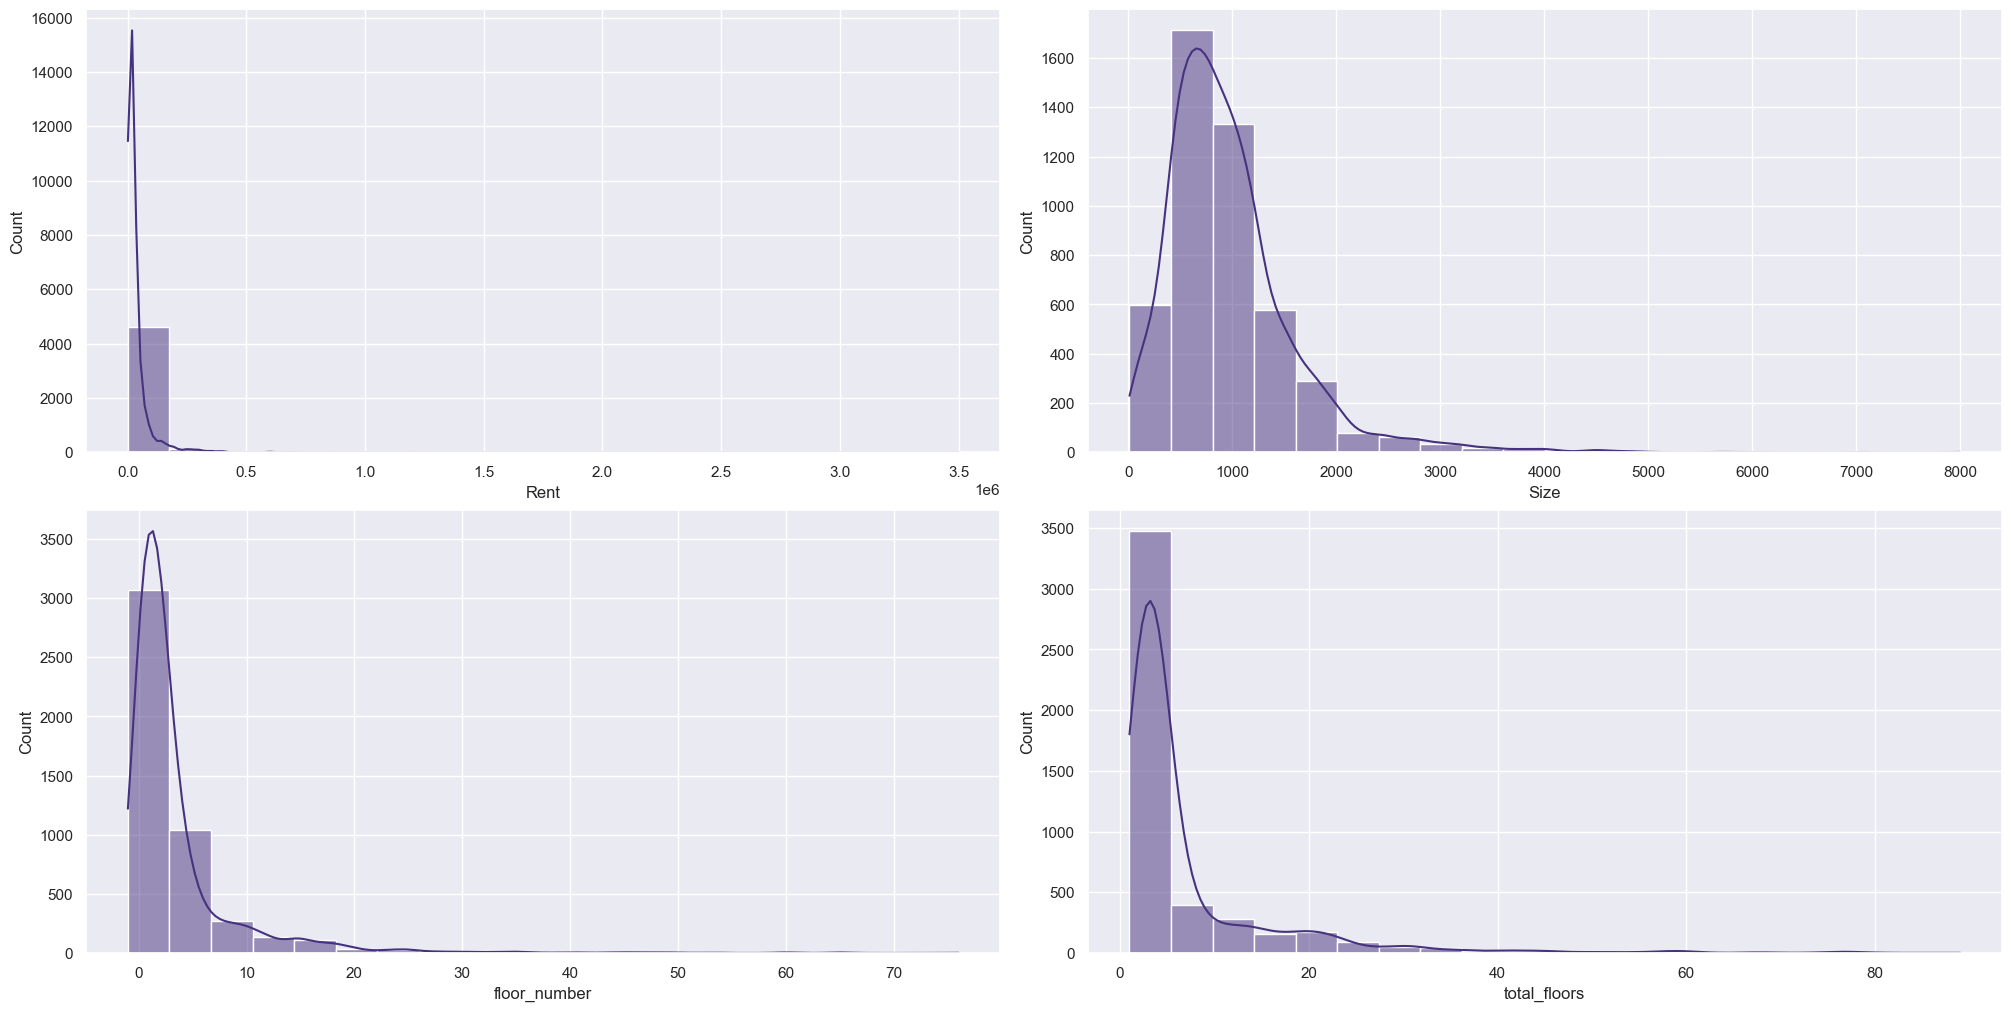

In [24]:
numerical = ['Rent', 'Size',
             'floor_number', 'total_floors']
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 10), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20)

plt.show()

## Skaliranje podataka

In [27]:
numerical = ['BHK', 'Rent', 'Size', 'Bathroom', 'floor_number', 'total_floors']
df_scaled = df.copy()

In [28]:
df.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4742.000000,4.742000e+03,4742.000000,4742.000000,4742.000000,4742.000000
mean,2.083720,3.500863e+04,967.669970,1.966048,3.440321,6.973429
std,0.832245,7.813758e+04,634.355762,0.884555,5.773964,9.469727
min,1.000000,1.200000e+03,10.000000,1.000000,-1.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,1.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,2.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,3.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,76.000000,89.000000



### Min-Max skaliranje

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled[numerical] = scaler.fit_transform(df[numerical])

df_scaled.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000
mean,0.216744,0.009663,0.119859,0.107339,0.057667,0.067880
std,0.166449,0.022333,0.079394,0.098284,0.074987,0.107611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.002515,0.067584,0.000000,0.025974,0.011364
50%,0.200000,0.004230,0.105131,0.111111,0.038961,0.034091
75%,0.400000,0.009089,0.148936,0.111111,0.051948,0.056818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


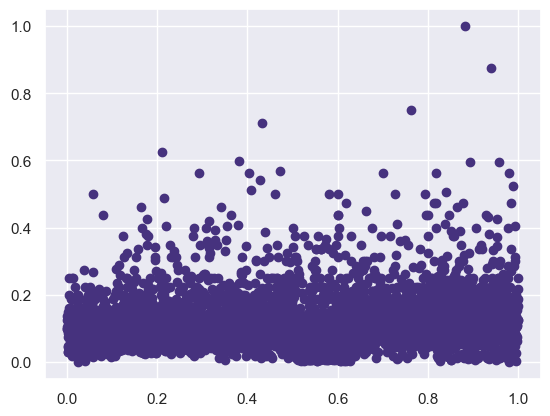

In [35]:
plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
            df_scaled['Size'])

In [30]:
scaler = MinMaxScaler((-2, 3))
df_scaled[numerical] = scaler.fit_transform(df[numerical])

df_scaled.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000
mean,-0.916280,-1.951685,-1.400707,-1.463307,-1.711667,-1.660601
std,0.832245,0.111663,0.396969,0.491419,0.374933,0.538053
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.987424,-1.662078,-2.000000,-1.870130,-1.943182
50%,-1.000000,-1.978850,-1.474343,-1.444444,-1.805195,-1.829545
75%,0.000000,-1.954556,-1.255319,-1.444444,-1.740260,-1.715909
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


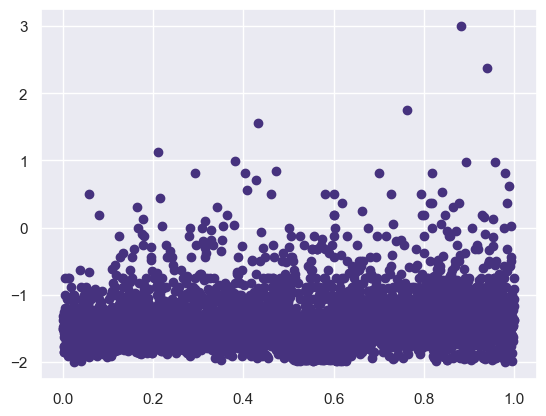

In [32]:
# plot distribution after scaling
plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
            df_scaled['Size'])

### Standardizacija (*z-score* skaliranje)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled[numerical] = scaler.fit_transform(df[numerical])

df_scaled.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4.742000e+03,4.742000e+03,4.742000e+03,4.742000e+03,4.742000e+03,4.742000e+03
mean,-8.391057e-17,-4.794890e-17,-7.791696e-17,-7.791696e-17,4.794890e-17,7.192335e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-1.302303e+00,-4.327264e-01,-1.509833e+00,-1.092244e+00,-7.691057e-01,-6.308586e-01
25%,-1.006060e-01,-3.200927e-01,-6.584854e-01,-1.092244e+00,-4.226867e-01,-5.252478e-01
50%,-1.006060e-01,-2.432969e-01,-1.855148e-01,3.838711e-02,-2.494772e-01,-3.140262e-01
75%,1.101091e+00,-2.570903e-02,3.662843e-01,3.838711e-02,-7.626770e-02,-1.028046e-01
max,4.706181e+00,4.434942e+01,1.108695e+01,9.083440e+00,1.256803e+01,8.662892e+00


(-2.0, 2.0)

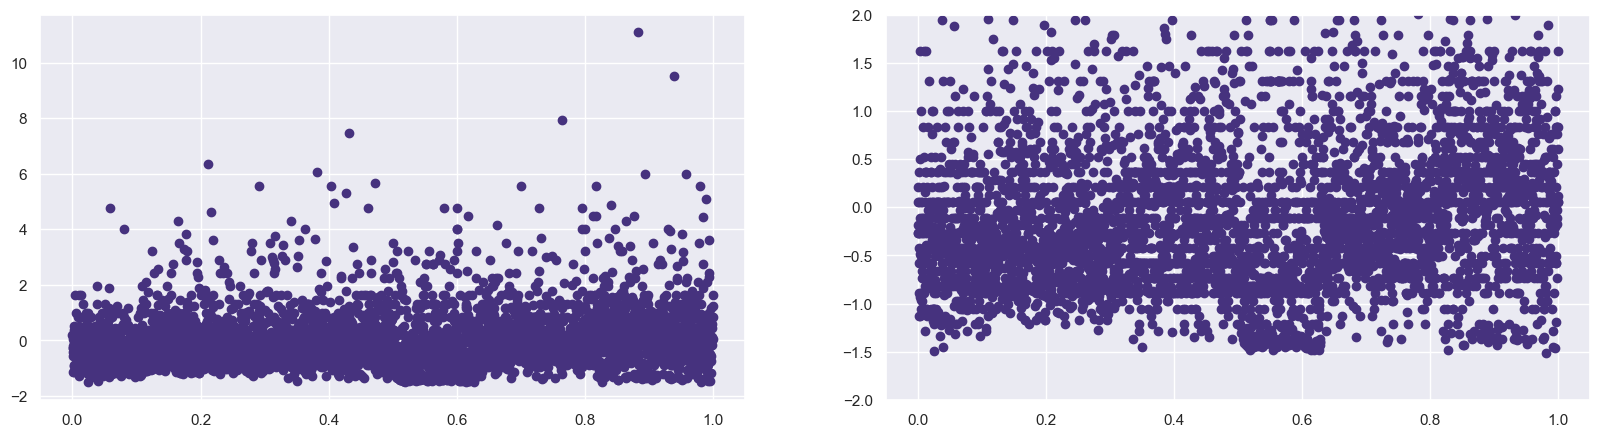

In [39]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
            df_scaled['Size'])
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
            df_scaled['Size'])
plt.ylim(-2, 2)

### Max-Abs skaliranje

In [40]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df_scaled[numerical] = scaler.fit_transform(df[numerical])

df_scaled.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000
mean,0.347287,0.010002,0.120959,0.196605,0.045267,0.078353
std,0.138707,0.022325,0.079294,0.088455,0.075973,0.106401
min,0.166667,0.000343,0.001250,0.100000,-0.013158,0.011236
25%,0.333333,0.002857,0.068750,0.100000,0.013158,0.022472
50%,0.333333,0.004571,0.106250,0.200000,0.026316,0.044944
75%,0.500000,0.009429,0.150000,0.200000,0.039474,0.067416
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### *Robust* skaliranje (na osnovu medijane i kvantila)

In [41]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled[numerical] = scaler.fit_transform(df[numerical])

df_scaled.describe()

,BHK,Rent,Size,Bathroom,floor_number,total_floors
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000
mean,0.083720,0.826462,0.181031,-0.033952,0.720160,0.743357
std,0.832245,3.397286,0.975932,0.884555,2.886982,2.367432
min,-1.000000,-0.643478,-1.292308,-1.000000,-1.500000,-0.750000
25%,0.000000,-0.260870,-0.461538,-1.000000,-0.500000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.739130,0.538462,0.000000,0.500000,0.500000
max,4.000000,151.478261,11.000000,8.000000,37.000000,21.250000


(-2.0, 3.0)

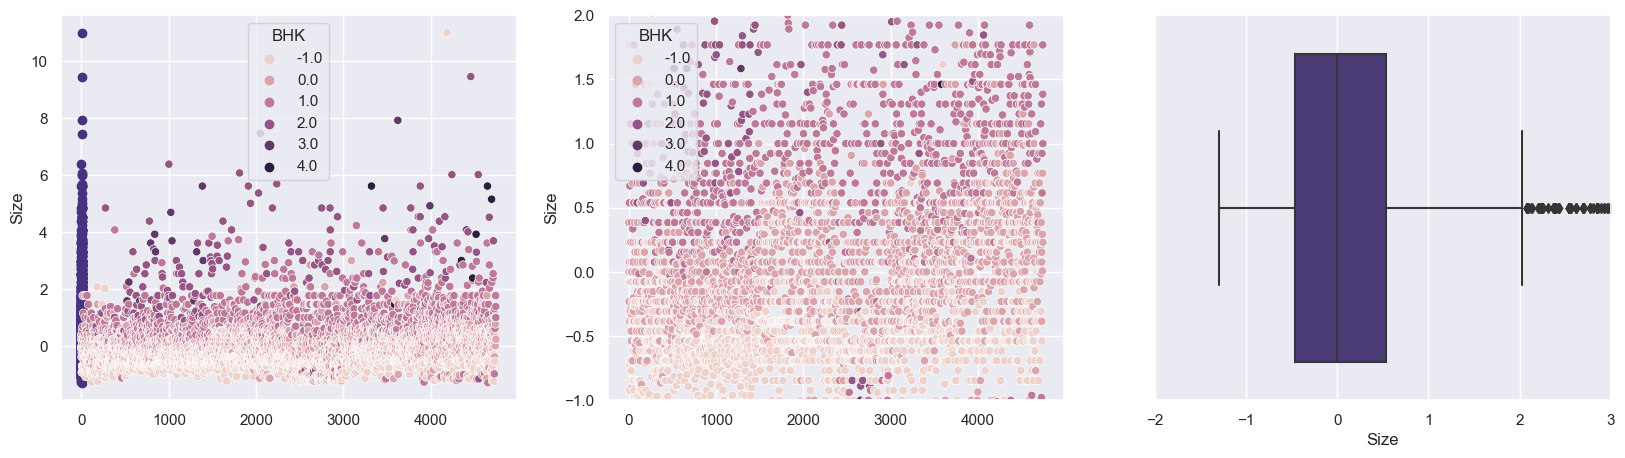

In [54]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
            df_scaled['Size'])
sns.scatterplot(df_scaled.index, x=df_scaled.index,
                y=df_scaled['Size'], hue=df_scaled['BHK'])
plt.subplot(1, 3, 2)
# plt.scatter(np.linspace(0, 1, len(df_scaled['Size'])),
#             df_scaled['Size'])
sns.scatterplot(df_scaled.index, x=df_scaled.index,
                y=df_scaled['Size'], hue=df_scaled['BHK'])
plt.ylim(-1, 2)
plt.subplot(1, 3, 3)
# box plot
sns.boxplot(x=df_scaled['Size'])
plt.xlim(-2, 3)

## Transformacije koje menjaju raspodelu vrednosti (nelinearne transformacije)

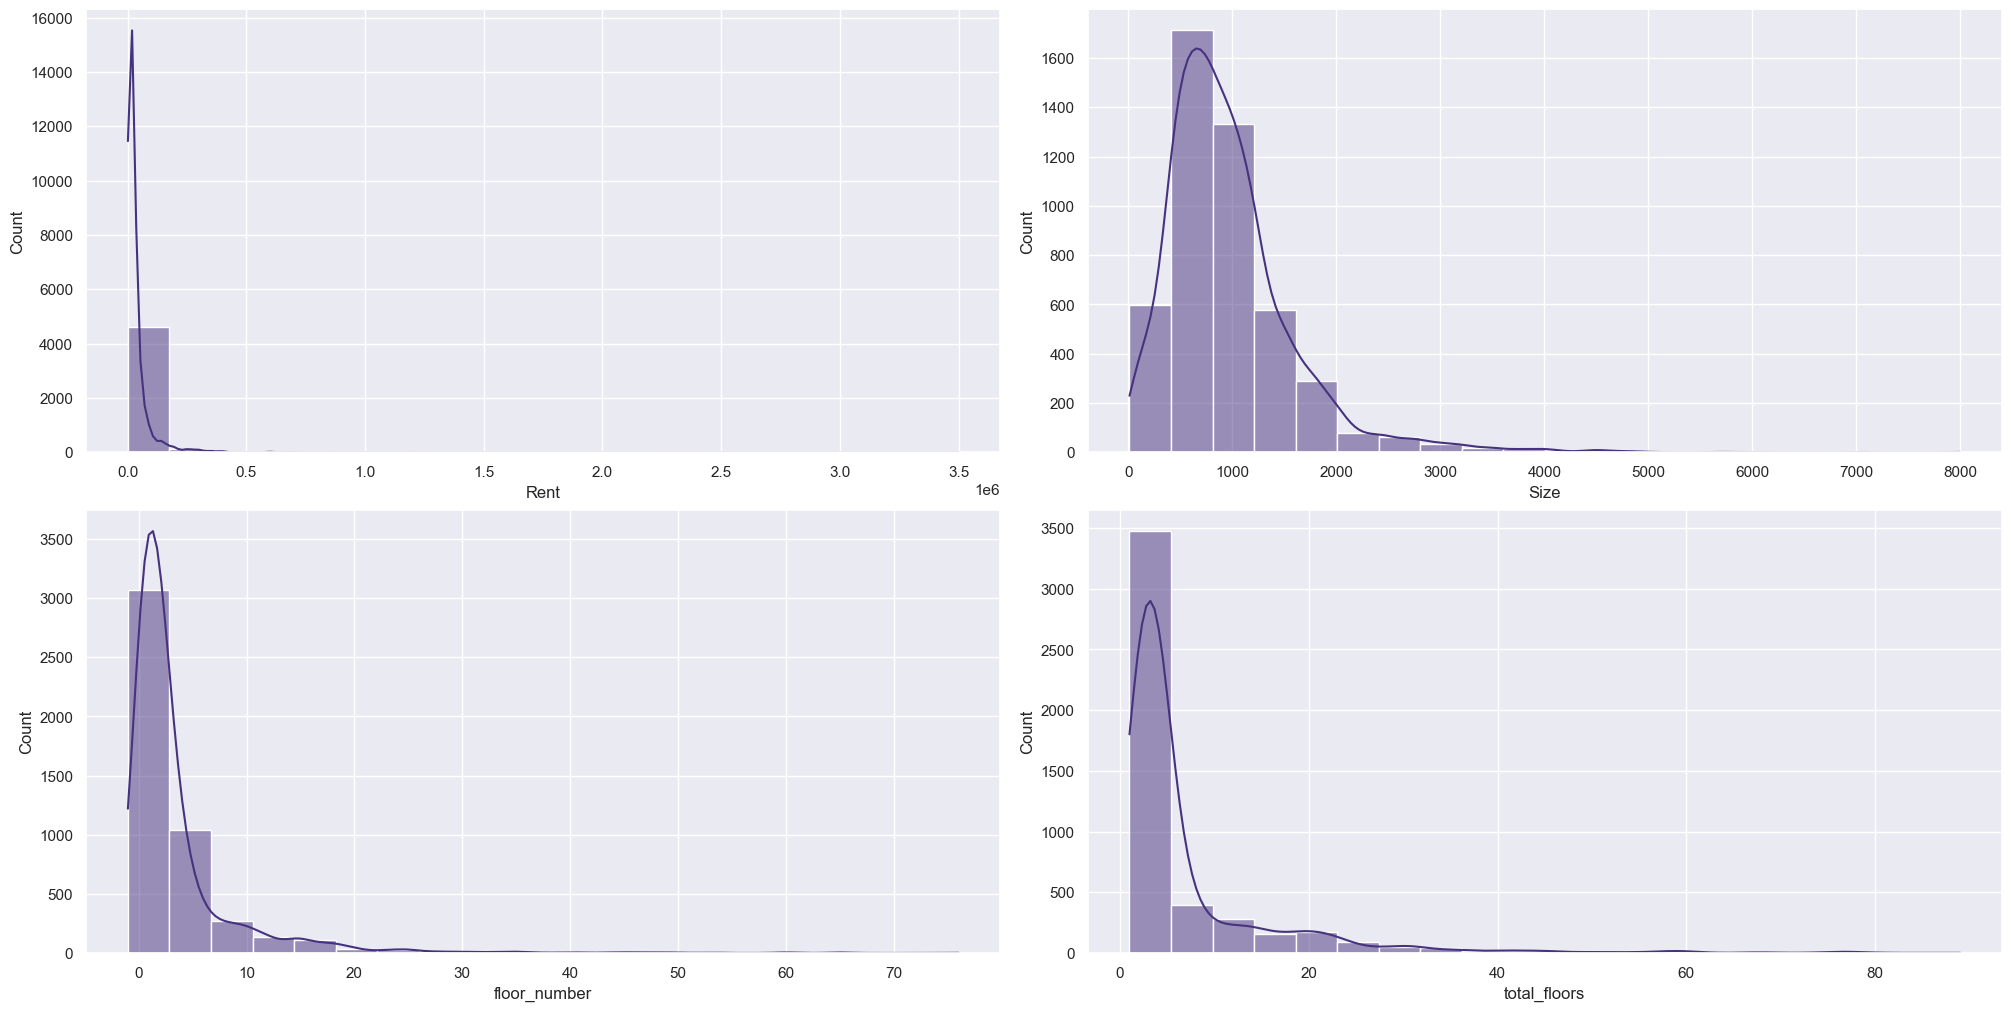

In [55]:
numerical = ['Rent', 'Size',
             'floor_number', 'total_floors']
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 10), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20)

### Logaritamska transformacija

In [56]:
import scipy.stats as stats

In [57]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [109]:
df_transformed = df.copy()

In [110]:
df_transformed = df_transformed[df_transformed['Rent'] < 800000]

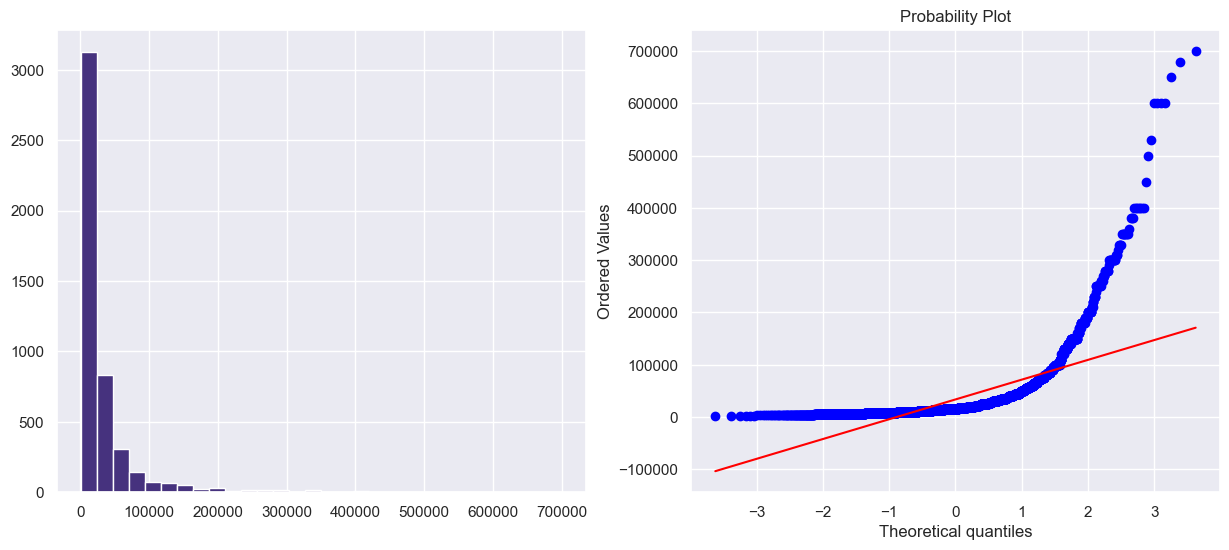

In [111]:
diagnostic_plots(df_transformed, 'Rent')

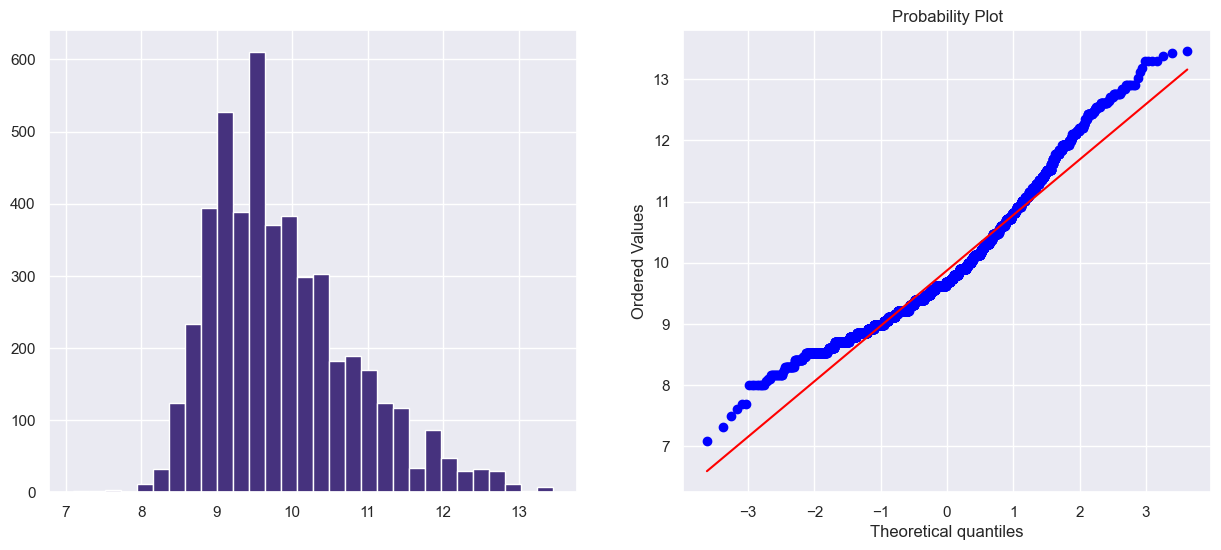

In [112]:
df_transformed['Rent'] = np.log(df_transformed['Rent']+2)

diagnostic_plots(df_transformed, 'Rent')